# Part 1: Language Modeling / Classification

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss

## Load Data

In [2]:
df = pd.read_csv('data/twitter_training.csv')
df.head()

2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...

## understanding data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
columns = ['id', 'branch', 'sentiment', 'tweet']
df.columns = columns

In [5]:
df.head()

id       branch sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   branch     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
missing_values = df.isnull().sum()
duplicated_values = df.duplicated().sum()

In [8]:
print("Missing Values in our data is:", missing_values)
print("------------------------------------------------")
print("Duplicated values that we have in our data is:", duplicated_values)

Missing Values in our data is: id             0
branch         0
sentiment      0
tweet        686
dtype: int64
------------------------------------------------
Duplicated values that we have in our data is: 2700


In [9]:
df = df.dropna().drop_duplicates()

In [10]:
df.duplicated().isnull().sum()

0

Text(0, 0.5, 'Counts')

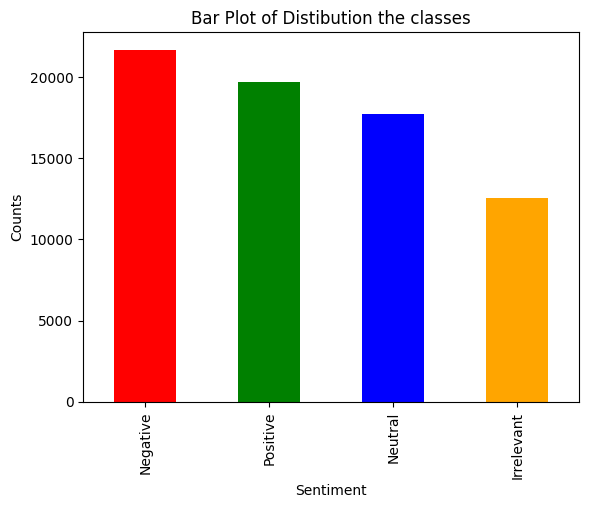

In [11]:
colors = ['red', 'green', 'blue', 'orange']
fig = df['sentiment'].value_counts().plot(kind='bar', color=colors)
fig.set_title('Bar Plot of Distibution the classes')
fig.set_xlabel('Sentiment')
fig.set_ylabel('Counts')

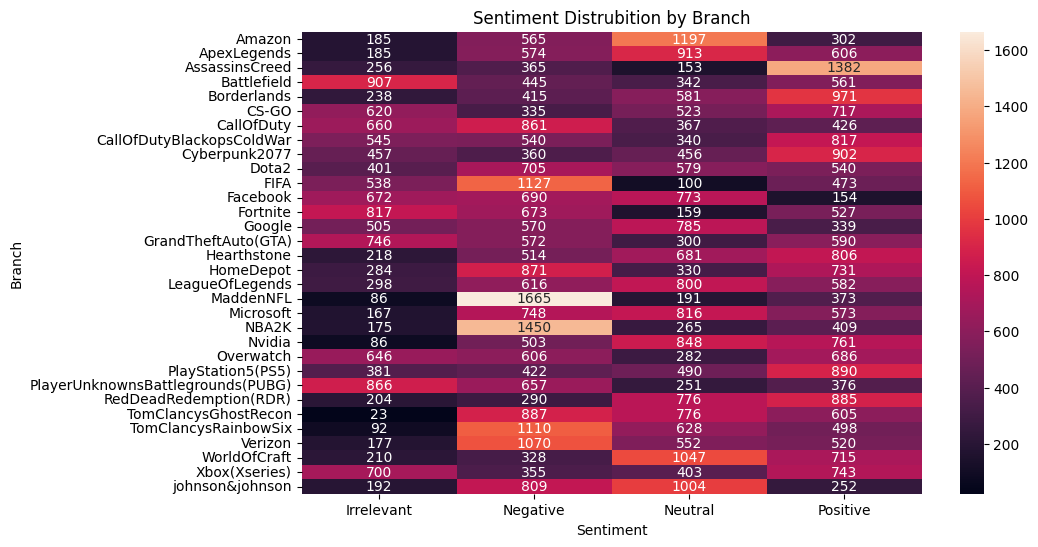

In [12]:
plt.figure(figsize=(10, 6))
count_table = pd.crosstab(index=df['branch'], columns = df['sentiment'])
sns.heatmap(count_table, annot=True, linecolor='black', fmt='d')
plt.title('Sentiment Distrubition by Branch')
plt.xlabel('Sentiment')
plt.ylabel('Branch')
plt.show()

# Cleaning The Data

In [13]:
def clean_data(text):
    text = text.lower()
    #Remove Html tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URL
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove Numeric Digits 
    text = re.sub(r'\d+', '', text)
    # Remove Ponctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    #remove the phrase that contain less than 2 words
    if len(text.split()) <2:
        return None
    else:
        return text

In [14]:
df['tweet'] = df['tweet'].apply(lambda x: clean_data(x))

In [15]:
df

id       branch sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                   tweet  
0      i am coming to the borders and i will kill you...  
1      im getting on borderlands and i will kill you all  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands  and i will murder y...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  just realized that the windows partition of my...  
74677  just realized that my mac window partition is ...  
74678  just realized the windows partition of my mac ...  
74679  just realized between the windows partition of...  
74680  just like the windows partition of my mac is l...  

[71655 rows x 4 columns]

In [16]:
df.isnull().sum()

id              0
branch          0
sentiment       0
tweet        2474
dtype: int64

In [17]:
df.duplicated().sum()

1117

In [18]:
df = df.dropna().drop_duplicates()

# Preprocessing the data

In [19]:
sw = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocessing_data(text):
    text = word_tokenize(text)
    text = [word for word in text if word not in sw]
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

def join_tokens(text):
    return ' '.join(text)

In [20]:
df['tweet'] = df['tweet'].apply(lambda x: preprocessing_data(x))
df['tweet_tokens'] = df['tweet'].apply(lambda x: join_tokens(x))

In [21]:
df

id       branch sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                   tweet  \
0                                 [coming, border, kill]   
1                        [im, getting, borderland, kill]   
2                       [im, coming, borderland, murder]   
3                      [im, getting, borderland, murder]   
4                      [im, getting, borderland, murder]   
...                                                  ...   
74676  [realized, window, partition, mac, like, year,...   
74677  [realized, mac, window, partition, year, behin...   
74678  [realized, window, partition, mac, year, behin...   
74679  [realized, window, partition, mac, like, year,...   
74680  [like, window, partition, mac, like, year, beh...   

                                            tweet_tokens  
0                                     coming border kill  
1                             im getting borderland kill  
2                            im coming borderland murder  
3                           im getting borderland murder  
4                           im getting borderland murder  
...                                                  ...  
74676  realized window partition mac like year behind...  
74677  realized mac window partition year behind nvid...  
74678  realized window partition mac year behind nvid...  
74679  realized window partition mac like year behind...  
74680  like window partition mac like year behind dri...  

[68711 rows x 5 columns]

# VECTORIZE DATA
## TFIDF

In [22]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(df['tweet_tokens'])
vocab = tfidf.get_feature_names_out()
result = result.toarray()
distr = np.sum(result, axis =0)
for tag, count in zip(vocab, distr):
    print(tag, count)

aa 2.096145981664594
aaa 7.730224929216231
aaaaaaaaaaaa 0.7196673956242913
aaaaaaaaaaaaa 1.2810538631543817
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa 0.6879656291396963
aaaaaaaaaaages 1.5553358511184658
aaaaaaaaaages 0.4726551193369936
aaaaaasee 0.3046233298215075
aaaahhh 1.5185131986778664
aaarated 0.5869224307574352
aadii 0.4531934065468928
aadiisawant 0.6698242472346598
aadil 2.191991672668809
aagainst 0.2855931279694679
aahqxwcz 0.7913809205850637
aajtak 1.3547557959247858
aall 0.6347056669295135
aamaavpjyc 0.9829437762639188
aarogya 2.2992209764935914
aaron 5.151830166808948
aaroncarter 0.9550441277442822
aarongreenberg 3.0798407707605815
aaronrivin 0.7157241950382254
aaronrodgers 3.5022034964811772
aat 1.557655364666865
aatjkpem 0.5000529092007057
aatmanirbhar 0.7665066333217008
aatmanirvar 0.3161840277929185
aawea 0.288612981524146
aaw

## BOW

In [23]:
cv = CountVectorizer()
result_cv = cv.fit_transform(df['tweet_tokens'])
vocab = cv.get_feature_names_out()
vocab

array(['aa', 'aaa', 'aaaaaaaaaaaa', ..., 'การออกอากาศของฉ', 'นจาก', 'ℐℓ'],
      dtype=object)

In [24]:
result_cv = result_cv.toarray()
dist = np.sum(result_cv, axis=0)

In [25]:
for tag, count in zip(vocab, dist):
    print(tag, count)

aa 86
aaa 28
aaaaaaaaaaaa 1
aaaaaaaaaaaaa 2
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa 1
aaaaaaaaaaages 4
aaaaaaaaaages 1
aaaaaasee 1
aaaahhh 5
aaarated 2
aadii 2
aadiisawant 3
aadil 4
aagainst 1
aahqxwcz 2
aajtak 3
aall 1
aamaavpjyc 2
aarogya 5
aaron 20
aaroncarter 3
aarongreenberg 6
aaronrivin 2
aaronrodgers 6
aat 4
aatjkpem 1
aatmanirbhar 3
aatmanirvar 1
aawea 1
aaweaot 1
aaxtapls 3
aazrytu 2
ab 23
aback 1
abah 5
abandon 47
abandoned 15
abandoning 1
abang 4
abash 2
abbas 1
abbassador 1
abbegrwdmemvo 1
abbott 10
abbottglobal 5
abbxvg 3
abby 5
abc 16
abccom 2
abccomexci 2
abcnewsarea 1
abcnewsbayarea 5
abducted 4
abducting 1
abdul 5
abeewdsndvh 1
abeg 6
abella 12
abezy 3
abhijeet 5
abhijit 1
abhorrent 3
abided 4
abilites 1
ability 91
able 372
ablet 1
ablogdadycomzifadangersb 1
abnormal 10
abnormality 1
aboard 12
abolished 2
abominable 4
abomi

# Word Embedding
## Word2Vec - Cbow by default sg=0 

In [26]:
model1 = gensim.models.Word2Vec(window = 5, min_count=5, epochs= 20)
model1.build_vocab(df['tweet'])

In [27]:
count_corpus = model1.corpus_count
print('Total Corpus is :', count_corpus)

Total Corpus is : 68711


### Train model

In [28]:
model1.train(df['tweet'], total_examples = count_corpus, epochs = model1.epochs)

(14234219, 15695220)

In [29]:
model1.wv.most_similar('return')

[('enchantment', 0.4891316592693329),
 ('login', 0.45418962836265564),
 ('sultan', 0.44892066717147827),
 ('ie', 0.4464462697505951),
 ('komoda', 0.4456802308559418),
 ('instability', 0.4434353709220886),
 ('receive', 0.4317103624343872),
 ('method', 0.42904746532440186),
 ('transferred', 0.42675164341926575),
 ('discard', 0.4231721758842468)]

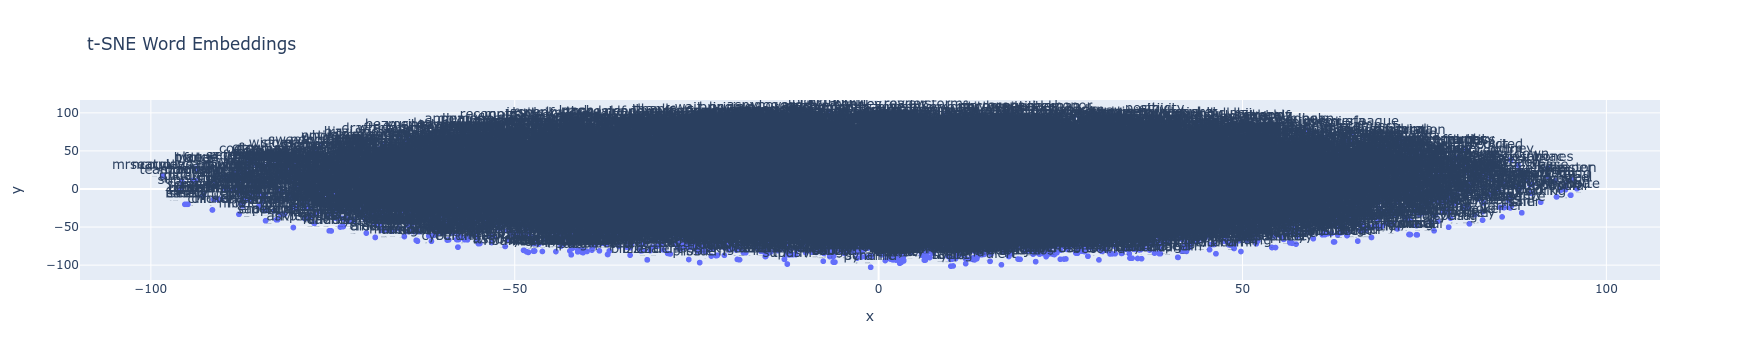

In [30]:
def tsne_plot_interactive(model):
    labels = []
    tokens = []
    
    # Extracting words and their vectors from our trained model 
    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    # Convert list of tokens to a numpy array
    tokens = np.array(tokens)
    
    # Train t-SNE 
    tsne_model = TSNE(perplexity=45, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    df_tsne = pd.DataFrame(new_values, columns=['x', 'y'])
    df_tsne['word'] = labels
    
    fig = px.scatter(df_tsne, x='x', y='y', text='word', title='t-SNE Word Embeddings')
    fig.update_traces(textposition='top center')
    fig.show()

# Call the function with the trained model
tsne_plot_interactive(model1)


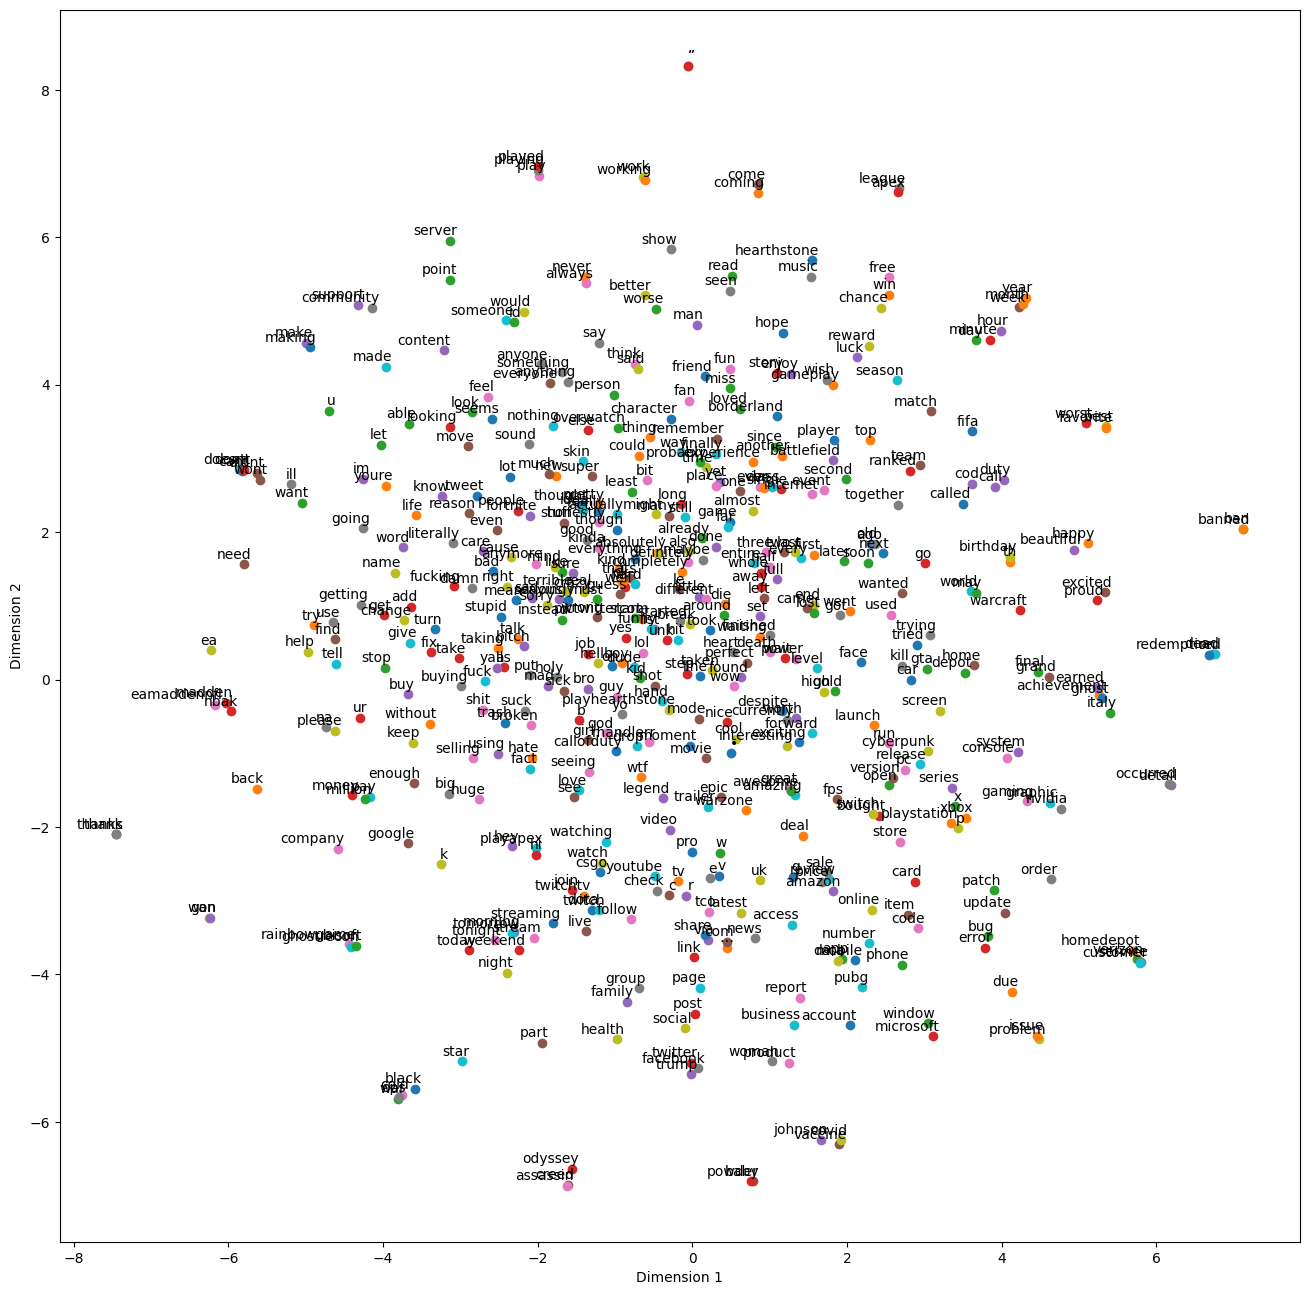

In [31]:
def tsne_plot_subsample(model, num_words=500):
    labels = []
    tokens = []
    
    # Extracting words and their vectors from our trained model 
    for word in model.wv.index_to_key[:num_words]:
        tokens.append(model.wv[word])
        labels.append(word)
    
    # Convert list of tokens to a numpy array
    tokens = np.array(tokens)
    
    # Train t-SNE 
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
    plt.show()

# Call the function with the trained model
tsne_plot_subsample(model1, num_words=500)


## Word2Vec SkiprGram by SG=1

In [32]:
model2 = gensim.models.Word2Vec(window = 5, min_count=5, epochs=20, sg=1)
model2.build_vocab(df['tweet'])
corpus_count = model2.corpus_count
corpus_count

68711

In [33]:
model2.train(df['tweet'], total_examples = corpus_count, epochs=model2.epochs)

(14234522, 15695220)

In [34]:
model2.wv.most_similar('cheat')

[('pssavewizard', 0.7071376442909241),
 ('italiansprbeast', 0.5838643312454224),
 ('battleeye', 0.5707952976226807),
 ('somethin', 0.5635911226272583),
 ('implement', 0.5032455921173096),
 ('ily', 0.4774037003517151),
 ('refer', 0.47047102451324463),
 ('murgur', 0.47045138478279114),
 ('murgurgle', 0.46226590871810913),
 ('hyperscape', 0.4529324471950531)]

In [35]:
model2.wv.similarity('cheat', 'csgo')

0.18596224

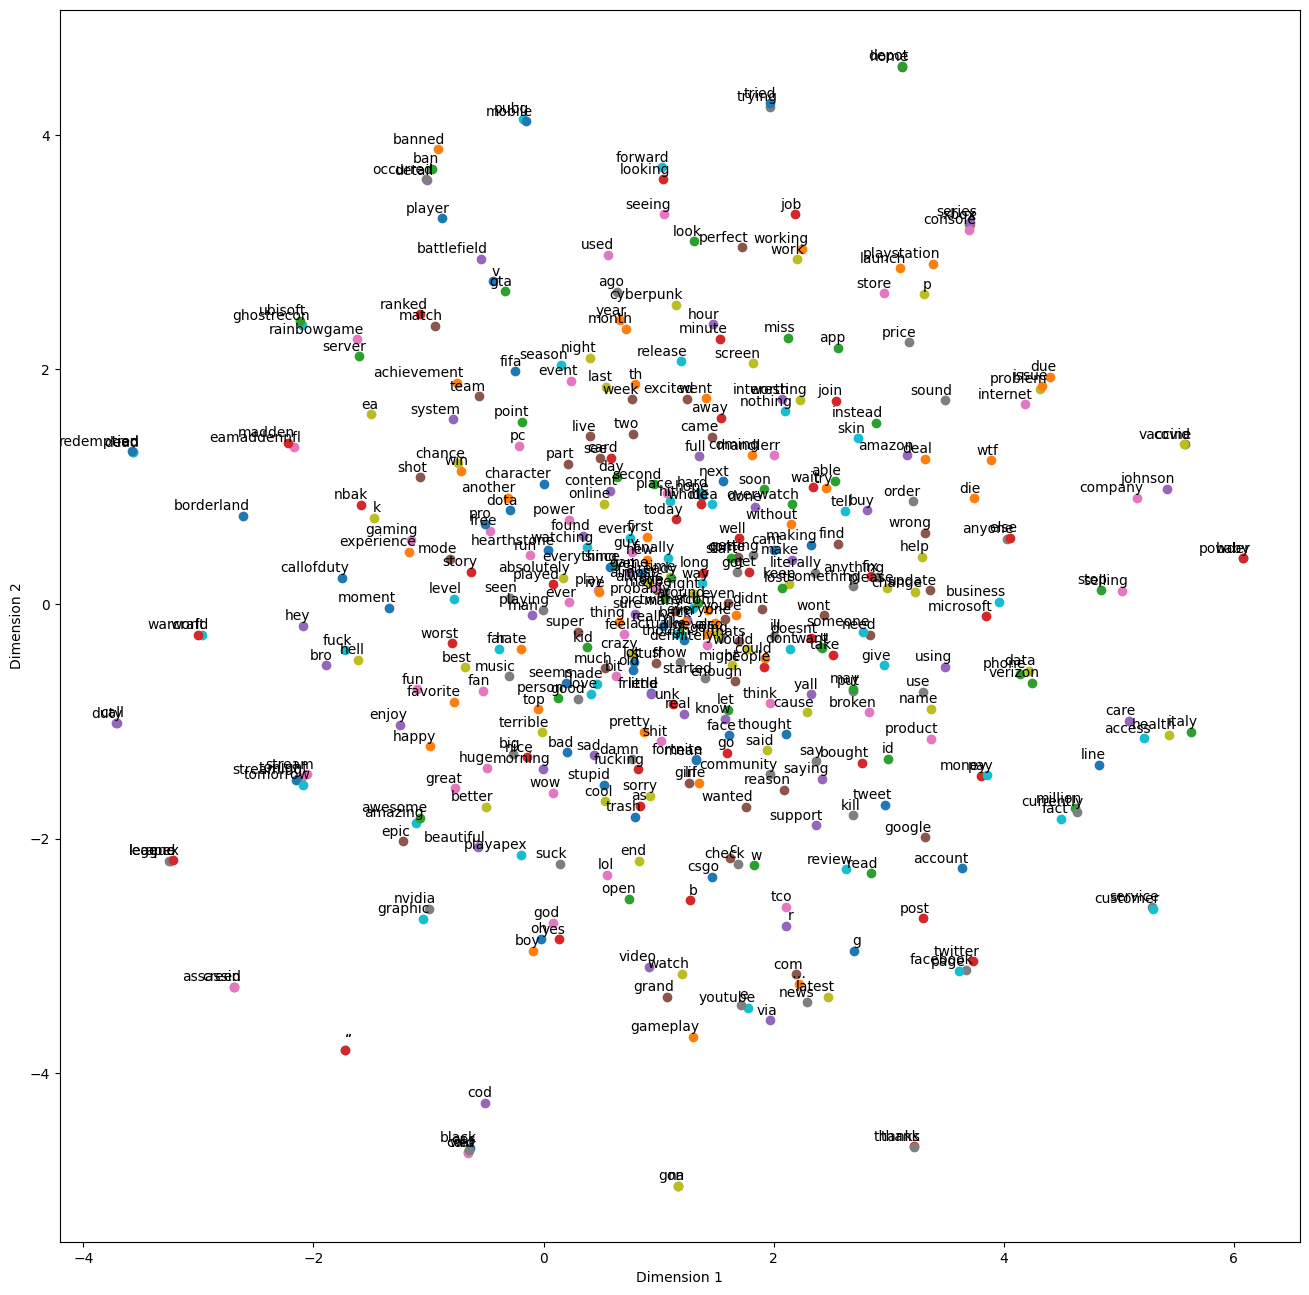

In [36]:
tsne_plot_subsample(model2, num_words=400)

## Feature Vector Creation
    Convert each document into a feature vector by averaging the word2vec vectors of the words in the document.

In [37]:
def feature_vector(document, model):
    document = [model.wv[word] for word in document if word in model.wv]
    if document:
        return np.mean(document,axis=0)
    else:
        return np.zeros(model.vector_size)

In [38]:
df['feature_vectorCBOW'] = df['tweet'].apply(lambda x: feature_vector(x, model1))
df['feature_vectorskipgram'] = df['tweet'].apply(lambda x: feature_vector(x, model2))

In [39]:
df

id       branch sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                   tweet  \
0                                 [coming, border, kill]   
1                        [im, getting, borderland, kill]   
2                       [im, coming, borderland, murder]   
3                      [im, getting, borderland, murder]   
4                      [im, getting, borderland, murder]   
...                                                  ...   
74676  [realized, window, partition, mac, like, year,...   
74677  [realized, mac, window, partition, year, behin...   
74678  [realized, window, partition, mac, year, behin...   
74679  [realized, window, partition, mac, like, year,...   
74680  [like, window, partition, mac, like, year, beh...   

                                            tweet_tokens  \
0                                     coming border kill   
1                             im getting borderland kill   
2                            im coming borderland murder   
3                           im getting borderland murder   
4                           im getting borderland murder   
...                                                  ...   
74676  realized window partition mac like year behind...   
74677  realized mac window partition year behind nvid...   
74678  realized window partition mac year behind nvid...   
74679  realized window partition mac like year behind...   
74680  like window partition mac like year behind dri...   

                                      feature_vectorCBOW  \
0      [-0.09283879, -1.1177231, 1.2481909, -1.429087...   
1      [-0.1261803, -0.6525653, 1.9677627, -0.5952359...   
2      [0.13307004, -0.49272498, 0.84767747, 0.713317...   
3      [-0.21917842, -0.12206891, 1.2629912, 0.555694...   
4      [-0.21917842, -0.12206891, 1.2629912, 0.555694...   
...                                                  ...   
74676  [0.09677332, 0.31857708, 0.31373638, 0.354015,...   
74677  [-0.044329297, 0.06945331, 0.26501486, 0.23200...   
74678  [-0.014620445, 0.17604366, 0.568492, 0.3098255...   
74679  [-0.20092447, 0.2284629, 0.833234, 0.22074366,...   
74680  [-0.21707164, 0.6458393, 0.4636482, 0.5588151,...   

                                  feature_vectorskipgram  
0      [-0.03144725, -0.16944104, 0.08409401, 0.01108...  
1      [-0.24100977, -0.31855506, 0.21014175, 0.17446...  
2      [-0.29170972, -0.23962253, -0.004511591, 0.148...  
3      [-0.32233185, -0.16010702, 0.069186844, 0.1219...  
4      [-0.32233185, -0.16010702, 0.069186844, 0.1219...  
...                                                  ...  
74676  [0.07426555, -0.091575645, 0.13595746, 0.09541...  
74677  [0.093314126, -0.041335013, 0.14174977, 0.1310...  
74678  [0.06264788, -0.09190826, 0.16474429, 0.127763...  
74679  [0.14672662, -0.15986072, 0.20244226, 0.145270...  
74680  [0.054721404, -0.10199757, 0.15195067, 0.07122...  

[68711 rows x 7 columns]

In [40]:
encoder = LabelEncoder()
df['SentimentEncoder'] = encoder.fit_transform(df['sentiment'])

# Modeling

In [41]:
X = np.vstack(df['feature_vectorskipgram'])
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X = scaler.fit_transform(X)
y = df['SentimentEncoder']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [43]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (54968, 100)
Shape of y_train: (54968,)
Shape of X_test: (13743, 100)
Shape of y_test: (13743,)


## Train models

In [45]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='auto'),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(),
}
metrics = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    loss = log_loss(y_test, y_proba) if y_proba is not None else None
    
    metrics[model_name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'loss': loss,
    }
    
    # Print metrics for each model
    if loss is not None:
        print(f'{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Loss: {loss:.4f}')
    else:
        print(f'{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Loss: Log loss cannot be calculated.')


Logistic Regression - Accuracy: 0.5365, F1 Score: 0.5215, Loss: 1.1012
AdaBoost - Accuracy: 0.4939, F1 Score: 0.4760, Loss: 1.3752
SVM - Accuracy: 0.7918, F1 Score: 0.7900, Loss: Log loss cannot be calculated.


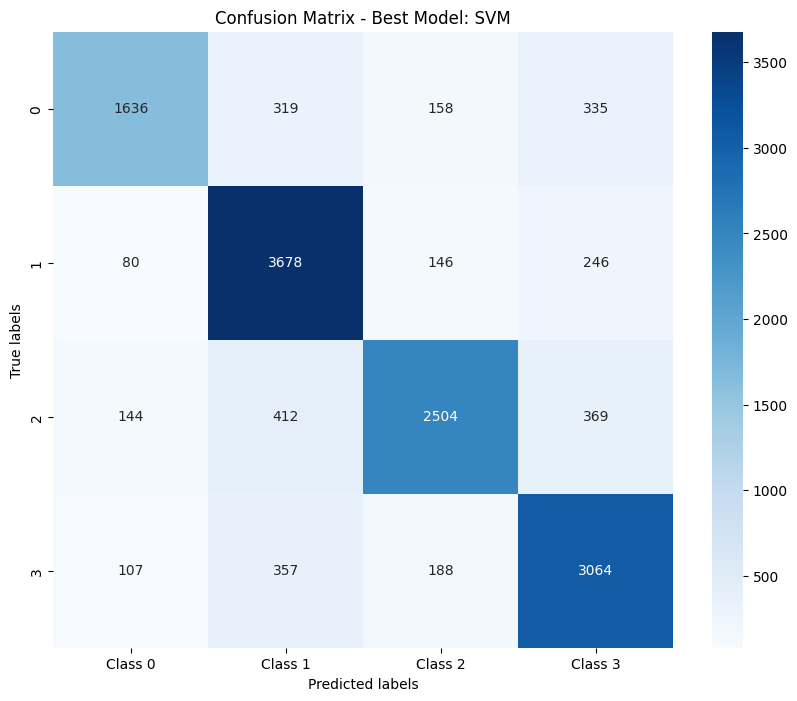

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the best performing model based on accuracy
best_model_name = max(metrics, key=lambda x: metrics[x]['accuracy'])

# Get predictions and probabilities for the best model
best_model = models[best_model_name]
best_y_pred = best_model.predict(X_test)
best_y_proba = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else None

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, best_y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix - Best Model: {best_model_name}')
plt.show()


# Conclusion 
    considering its high accuracy, consistent performance, robustness to imbalanced data, and interpretability, the SVM model emerges as the best choice for the given classification task.